08/26

Let's begin to plot the last 2 plots

In [1]:
import numpy as np
import pickle
from matplotlib import pyplot as plt
import itertools
from pymc3_hpd import *
from scipy import stats
from scipy.linalg import lstsq
import copy


y = np.loadtxt("/home/gw2397/cluster_new/pixel/Y.csv", delimiter=",", dtype = int)
N = y.shape[0]
T = y.shape[1]
p = 2

plotFolder = '/home/gw2397/cluster_new/pixel/fig2_supp/plots/'

/home/gw2397/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/gw2397/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/home/gw2397/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/gw2397/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


Looks good, let's get started.

In [2]:
filename = 'NB1'
with open(filename + '_t_fit.pkl', 'rb') as f: t_fit_NB_c1 = pickle.load(f)
with open(filename + '_Z_fit.pkl', 'rb') as f: Z_fit_NB_c1 = pickle.load(f)
with open(filename + '_states_fit.pkl', 'rb') as f: states_fit_NB_c1 = pickle.load(f)
with open(filename + '_muX_fit.pkl', 'rb') as f: muX_fit_NB_c1 = pickle.load(f)

filename = 'NB2'
with open(filename + '_t_fit.pkl', 'rb') as f: t_fit_NB_c2 = pickle.load(f)
with open(filename + '_Z_fit.pkl', 'rb') as f: Z_fit_NB_c2 = pickle.load(f)
with open(filename + '_states_fit.pkl', 'rb') as f: states_fit_NB_c2 = pickle.load(f)
with open(filename + '_muX_fit.pkl', 'rb') as f: muX_fit_NB_c2 = pickle.load(f)
    
filename = 'poi1'
with open(filename + '_t_fit.pkl', 'rb') as f: t_fit_Poi_c1 = pickle.load(f)
with open(filename + '_Z_fit.pkl', 'rb') as f: Z_fit_Poi_c1 = pickle.load(f)
with open(filename + '_states_fit.pkl', 'rb') as f: states_fit_Poi_c1 = pickle.load(f)
with open(filename + '_muX_fit.pkl', 'rb') as f: muX_fit_Poi_c1 = pickle.load(f)

filename = 'poi2'
with open(filename + '_t_fit.pkl', 'rb') as f: t_fit_Poi_c2 = pickle.load(f)
with open(filename + '_Z_fit.pkl', 'rb') as f: Z_fit_Poi_c2 = pickle.load(f)
with open(filename + '_states_fit.pkl', 'rb') as f: states_fit_Poi_c2 = pickle.load(f)
with open(filename + '_muX_fit.pkl', 'rb') as f: muX_fit_Poi_c2 = pickle.load(f)

# 1. histograms of nCluster & nState

In [3]:
def intHist(samp):
    n_iter = samp.size
    data = samp[int(n_iter/4):]
    try:
        d = np.diff(np.unique(data)).min()
        left_of_first_bin = data.min() - float(d)/2
        right_of_last_bin = data.max() + float(d)/2
        plt.hist(data, np.arange(left_of_first_bin, right_of_last_bin + d, d), density=True)
    except:
        plt.hist(data, density=True)
    

## 1A. nCluster

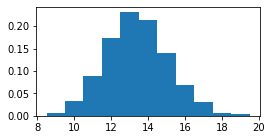

In [4]:
plt.rcParams['figure.figsize'] = [4, 2]
intHist(t_fit_NB_c1)
plt.savefig(plotFolder + "hist_nNeuron_NB1.svg")

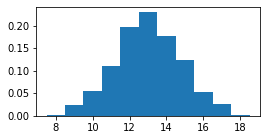

In [5]:
intHist(t_fit_NB_c2)
plt.savefig(plotFolder + "hist_nNeuron_NB2.svg")

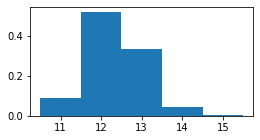

In [6]:
intHist(t_fit_Poi_c1)
plt.savefig(plotFolder + "hist_nNeuron_poi1.svg")

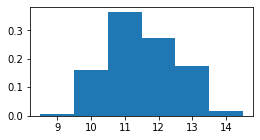

In [7]:
intHist(t_fit_Poi_c2)
plt.savefig(plotFolder + "hist_nNeuron_poi2.svg")

In [ ]:
# previous nClus_MAP = 13

## 1B. nStates

OK, this suggests the upper limit of the state is too small...

In [8]:
def nStates(states_fit):
    n_iter = states_fit.shape[0]
    n_states_fit = np.zeros((n_iter,), dtype = int)
    for kk in range(n_iter):
        n_states_fit[kk] = np.unique(states_fit[kk,:]).size
    return n_states_fit

In [9]:
n_states_fit_NB_c1 = nStates(states_fit_NB_c1) # 8

In [10]:
n_states_fit_NB_c2 = nStates(states_fit_NB_c2) # 10

In [11]:
n_states_fit_Poi_c1 = nStates(states_fit_Poi_c1) # 11

In [12]:
n_states_fit_Poi_c2 = nStates(states_fit_Poi_c2) # 14

# 2. similarity matrix -- neuron

sortedd by both maxPEAR & anatomy

In [13]:
lab_neuron = np.loadtxt("Lab_neuron.csv", delimiter=",", dtype = int)-1
unique_neuron, counts_neuron = np.unique(lab_neuron, return_counts=True)
regionn_name = ['CA1', 'LP', 'VISp']

In [14]:
def writesampCSV(samp, fileName):
    n_iter = samp.shape[0]
    iter_use_start = int(n_iter/4)
    np.savetxt(fileName, samp[iter_use_start:,:], delimiter=",")

In [15]:
writesampCSV(Z_fit_NB_c1, "Z_NB_c1.csv")
writesampCSV(Z_fit_NB_c2, "Z_NB_c2.csv")
writesampCSV(Z_fit_Poi_c1, "Z_Poi_c1.csv")
writesampCSV(Z_fit_Poi_c2, "Z_Poi_c2.csv")

In [16]:
# then use R to get maxPEAR
Z_NB_c1_maxPEAR = np.loadtxt("Z_NB_c1_maxPEAR.csv", delimiter=",", dtype = int) - 1
Z_NB_c2_maxPEAR = np.loadtxt("Z_NB_c2_maxPEAR.csv", delimiter=",", dtype = int) - 1
Z_Poi_c1_maxPEAR = np.loadtxt("Z_Poi_c1_maxPEAR.csv", delimiter=",", dtype = int) - 1
Z_Poi_c2_maxPEAR = np.loadtxt("Z_Poi_c2_maxPEAR.csv", delimiter=",", dtype = int) - 1

In [17]:
def buildSimMat(smaples):
    
    N = smaples.shape[1]
    n_iter = smaples.shape[0]
    iter_use_start = int(n_iter/4)
    
    simMat = np.zeros((N,N))
    count = 0
    for g in range(iter_use_start, n_iter):
        count = count + 1
        for k in range(simMat.shape[0]):
            simMat[k,:] = simMat[k,:] + (smaples[g,k] == smaples[g,:])
    simMat = simMat/count        
    return simMat

def idxFunc(Z_samp, lab_neuron):
    id_all = np.argsort(Z_samp)
    id_sep = np.zeros((N,), dtype = int)
    for k in range(unique_neuron.size):
        idTmp = np.argsort(Z_samp[lab_neuron == k])
        id_sep[lab_neuron == k] = np.sum(lab_neuron < k) + idTmp
    return id_all, id_sep

def simMaxPEAR(simMat, id_all):
    plt.imshow(simMat[np.ix_(id_all, id_all)], aspect="auto", cmap = 'Greys')
    plt.xlim([0,N])
    plt.ylim([0,N])
    plt.colorbar()

def maxPEARAnatomy(simMat, id_sep):
    fig, ax = plt.subplots()
    heatMap = ax.imshow(simMat[np.ix_(id_sep, id_sep)], aspect="auto", cmap = 'Greys')
    ax.set_xlim([0,N])
    ax.set_ylim([0,N])
    tickPos = np.zeros((unique_neuron.size,))
    for k in range(unique_neuron.size):
        pos_tmp = np.sum(counts_neuron[0:(k+1)]) + 0.5
        ax.axvline(pos_tmp)
        ax.axhline(pos_tmp)
        tickPos[k] = np.sum(counts_neuron[0:k]) + counts_neuron[k]/2
    fig.colorbar(heatMap)
    # ax = plt.axes()
    ax.set_xticks(tickPos)
    ax.set_xticklabels(regionn_name)
    ax.set_yticks(tickPos)
    ax.set_yticklabels(regionn_name)

## NB chain1

In [18]:
id_all_NB_c1, id_sep_NB_c1 = idxFunc(Z_NB_c1_maxPEAR, lab_neuron)
simMat_neuron_NB_c1 = buildSimMat(Z_fit_NB_c1)

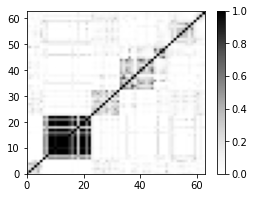

In [19]:
plt.rcParams['figure.figsize'] = [4, 3]
simMaxPEAR(simMat_neuron_NB_c1, id_all_NB_c1)
plt.savefig(plotFolder + "simMat_maxPEAR_Z_NB1.svg")

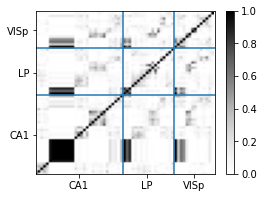

In [20]:
maxPEARAnatomy(simMat_neuron_NB_c1, id_sep_NB_c1)
plt.savefig(plotFolder + "simMat_anatomy_Z_NB1.svg")

## NB chain 2

In [21]:
simMat_neuron_NB_c2 = buildSimMat(Z_fit_NB_c2)

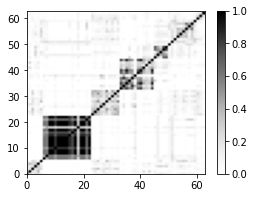

In [22]:
simMaxPEAR(simMat_neuron_NB_c2, id_all_NB_c1)
plt.savefig(plotFolder + "simMat_maxPEAR_Z_NB2.svg")

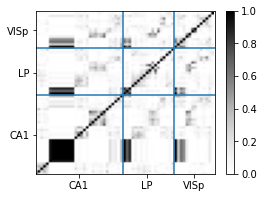

In [23]:
maxPEARAnatomy(simMat_neuron_NB_c1, id_sep_NB_c1)
plt.savefig(plotFolder + "simMat_anatomy_Z_NB2.svg")

## Poisson chain 1

In [24]:
simMat_neuron_Poi_c1 = buildSimMat(Z_fit_Poi_c1)

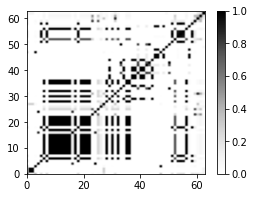

In [25]:
simMaxPEAR(simMat_neuron_Poi_c1, id_all_NB_c1)
plt.savefig(plotFolder + "simMat_maxPEAR_Z_poi1.svg")

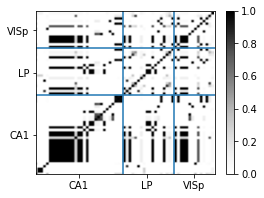

In [26]:
maxPEARAnatomy(simMat_neuron_Poi_c1, id_sep_NB_c1)
plt.savefig(plotFolder + "simMat_anatomy_Z_poi1.svg")

## Poisson chain 2

In [27]:
simMat_neuron_Poi_c2 = buildSimMat(Z_fit_Poi_c2)

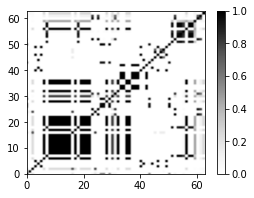

In [28]:
simMaxPEAR(simMat_neuron_Poi_c2, id_all_NB_c1)
plt.savefig(plotFolder + "simMat_maxPEAR_Z_poi2.svg")

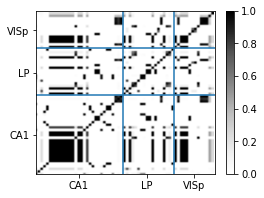

In [29]:
maxPEARAnatomy(simMat_neuron_Poi_c2, id_sep_NB_c1)
plt.savefig(plotFolder + "simMat_anatomy_Z_poi2.svg")

In [ ]:
# previous...
samp_pre = np.loadtxt("zLab.csv", delimiter=",", dtype = int) - 1
simMat_pre = np.zeros((N,N))
count = 0
for g in range(samp_pre.shape[0]):
    count = count + 1
    for k in range(simMat.shape[0]):
        simMat_pre[k,:] = simMat_pre[k,:] + (samp_pre[g,k] == samp_pre[g,:])
simMat_pre = simMat_pre/count

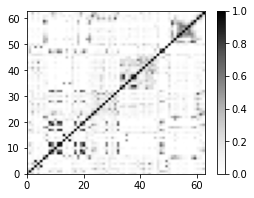

In [38]:
simMaxPEAR(simMat_pre, id_all_NB_c1)
plt.savefig(plotFolder + "simMat_maxPEAR_pre.svg")

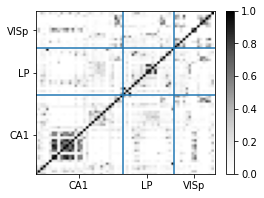

In [39]:
maxPEARAnatomy(simMat_pre, id_sep_NB_c1)
plt.savefig(plotFolder + "simMat_anatomy_pre.svg")

# 3. similarity matrix - states

In [41]:
Tmark_bin = np.array([60,660])
lab_state = np.loadtxt("Lab_states.csv", delimiter=",", dtype = int)

simMat_states_NB_c1 = buildSimMat(states_fit_NB_c1)
simMat_states_NB_c2 = buildSimMat(states_fit_NB_c2)
simMat_states_Poi_c1 = buildSimMat(states_fit_Poi_c1)
simMat_states_Poi_c2 = buildSimMat(states_fit_Poi_c2)

states_name = ['S', 'N1', 'S']
Tmark_expand = np.array([0, *Tmark_bin, T])
tickPos = np.zeros((Tmark_bin.size+1,))
for kk in range(tickPos.size):
    tickPos[kk] = (Tmark_expand[kk] + Tmark_expand[kk+1])/2

def sim_states(simMat):
    fig, ax = plt.subplots()
    heatMap = ax.imshow(simMat, aspect="auto", cmap = 'Greys')
    ax.set_xlim([0,T])
    ax.set_ylim([0,T])
    fig.colorbar(heatMap)
    for ll in range(Tmark_bin.size):
        ax.axvline(Tmark_bin[ll])
        ax.axhline(Tmark_bin[ll])
#     ax.set_xticks(tickPos)
#     ax.set_xticklabels(states_name)
#     ax.set_yticks(tickPos)
#     ax.set_yticklabels(states_name)

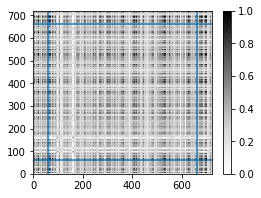

In [42]:
sim_states(simMat_states_NB_c1)
plt.savefig(plotFolder + "simMat_states_NB1.svg")

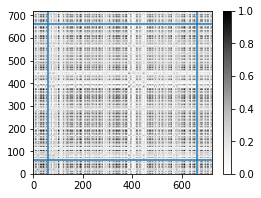

In [43]:
sim_states(simMat_states_NB_c2)
plt.savefig(plotFolder + "simMat_states_NB2.svg")

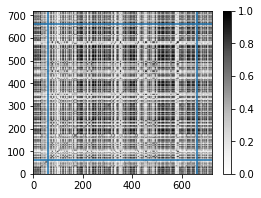

In [44]:
sim_states(simMat_states_Poi_c1)
plt.savefig(plotFolder + "simMat_states_poi1.svg")

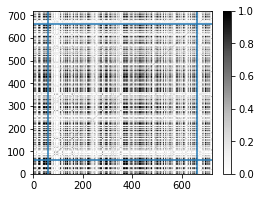

In [45]:
sim_states(simMat_states_Poi_c2)
plt.savefig(plotFolder + "simMat_states_poi2.svg")

# 4. maxPEAR of states

In [46]:
writesampCSV(states_fit_NB_c1, "states_NB_c1.csv")
writesampCSV(states_fit_NB_c2, "states_NB_c2.csv")
writesampCSV(states_fit_Poi_c1, "states_Poi_c1.csv")
writesampCSV(states_fit_Poi_c2, "states_Poi_c2.csv")

# use R to get maxPEAR
states_NB_c1_maxPEAR = np.loadtxt("states_NB_c1_maxPEAR.csv", delimiter=",", dtype = int) - 1
states_NB_c2_maxPEAR = np.loadtxt("states_NB_c2_maxPEAR.csv", delimiter=",", dtype = int) - 1
states_Poi_c1_maxPEAR = np.loadtxt("states_Poi_c1_maxPEAR.csv", delimiter=",", dtype = int) - 1
states_Poi_c2_maxPEAR = np.loadtxt("states_Poi_c2_maxPEAR.csv", delimiter=",", dtype = int) - 1

In [47]:
# def states_swap(states_raw, states_ref):
#     states_unique = np.unique(states_raw)
#     all_permute = list(itertools.permutations(states_unique))
#     min_se = np.Inf
#     min_idx = -99
#     for kk in range(len(all_permute)):
#         permute_tmp = all_permute[kk]
#         swap_tmp = {l:permute_tmp[l] for l in range(len(permute_tmp))}
#         swap_states_tmp = np.array([swap_tmp[x] for x in states_raw])
# #         se_tmp = sum((swap_states_tmp - states_ref)**2)
#         se_tmp = sum(np.abs(swap_states_tmp - states_ref))
#         if se_tmp < min_se:
#             min_se = se_tmp
#             min_idx = kk

#     permute_tmp = all_permute[min_idx]
#     swap_tmp = {l:permute_tmp[l] for l in range(len(permute_tmp))}
#     states_swap = np.array([swap_tmp[x] for x in states_raw])
    
#     return states_swap

In [48]:
# states_NB_c1_maxPEAR_swap = states_swap(states_NB_c1_maxPEAR, states_NB_c2_maxPEAR)
# states_NB_c2_maxPEAR_swap = states_swap(states_NB_c2_maxPEAR, states_NB_c2_maxPEAR)
# states_Poi_c1_maxPEAR_swap = states_swap(states_Poi_c1_maxPEAR, states_NB_c2_maxPEAR)
# states_Poi_c2_maxPEAR_swap = states_swap(states_Poi_c2_maxPEAR, states_NB_c2_maxPEAR)
states_NB_c1_maxPEAR_swap = states_NB_c1_maxPEAR
states_NB_c2_maxPEAR_swap = states_NB_c2_maxPEAR
states_Poi_c1_maxPEAR_swap = states_Poi_c1_maxPEAR
states_Poi_c2_maxPEAR_swap = states_Poi_c2_maxPEAR

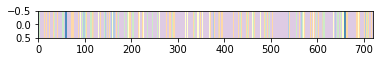

In [49]:
plt.rcParams['figure.figsize'] = [6, .5]
plt.imshow(states_NB_c1_maxPEAR_swap[None,:], aspect="auto", cmap='Pastel1')
for ll in range(Tmark_bin.size):
    plt.axvline(Tmark_bin[ll])
plt.xlim([0, T])
plt.savefig(plotFolder + "states_NB1.svg")

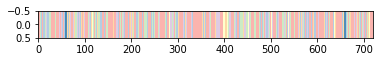

In [50]:
plt.rcParams['figure.figsize'] = [6, .5]
plt.imshow(states_NB_c2_maxPEAR_swap[None,:], aspect="auto", cmap='Pastel1')
for ll in range(Tmark_bin.size):
    plt.axvline(Tmark_bin[ll])
plt.xlim([0, T])
plt.savefig(plotFolder + "states_NB2.svg")

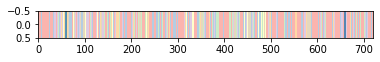

In [51]:
plt.rcParams['figure.figsize'] = [6, .5]
plt.imshow(states_Poi_c1_maxPEAR_swap[None,:], aspect="auto", cmap='Pastel1')
for ll in range(Tmark_bin.size):
    plt.axvline(Tmark_bin[ll])
plt.xlim([0, T])
plt.savefig(plotFolder + "states_poi1.svg")

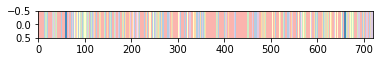

In [52]:
plt.rcParams['figure.figsize'] = [6, .5]
plt.imshow(states_Poi_c2_maxPEAR_swap[None,:], aspect="auto", cmap='Pastel1')
for ll in range(Tmark_bin.size):
    plt.axvline(Tmark_bin[ll])
plt.xlim([0, T])
plt.savefig(plotFolder + "states_poi2.svg")

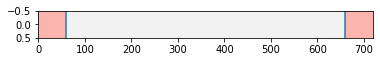

In [54]:
plt.imshow(lab_state[None,:], aspect="auto", cmap='Pastel1')
for ll in range(Tmark_bin.size):
    plt.axvline(Tmark_bin[ll])
plt.xlim([0, T])
plt.savefig(plotFolder + "states_true.svg")

# 5. latent states for largest maxPEAR cluster

In [55]:
Z_NB_maxPEAR_use = Z_NB_c1_maxPEAR
Z_NB_use = Z_fit_NB_c1
muX_NB_use = muX_fit_NB_c1
# Z_NB_maxPEAR_use = Z_NB_c2_maxPEAR
# Z_NB_use = Z_fit_NB_c2
# muX_NB_use = muX_fit_NB_c2



n_iter = Z_NB_use.shape[0]
iter_use_start = int(n_iter/4)

Z_unique, Z_counts = np.unique(Z_NB_maxPEAR_use, return_counts=True)
Z_max_idx = np.where(Z_counts == Z_counts.max())[0][0]
neuron_plot = Z_NB_maxPEAR_use == Z_unique[Z_max_idx]

In [56]:
z_clus_plot = np.ones((n_iter,), dtype = int)*-99
mu_clus_plot = np.zeros((n_iter,T))
X_clus_plot = np.zeros((n_iter,p,T))

z_clus_plot = stats.mode(Z_NB_use[:,neuron_plot].T)[0][0]
for kk in range(n_iter):
    mu_clus_plot[kk,:] = muX_NB_use[kk][z_clus_plot[kk]][0,:]
    X_clus_plot[kk,:,:] = muX_NB_use[kk][z_clus_plot[kk]][1:,:]


## mu

In [57]:
mu_samp = mu_clus_plot[iter_use_start:,:]
hdp_tmp = hpd(mu_samp, alpha=0.025)
muMean_plot = np.mean(mu_samp,0)
muLB_plot = hdp_tmp[:,0]
muUB_plot = hdp_tmp[:,1]

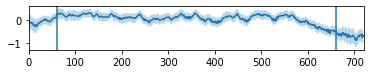

In [108]:
plt.rcParams['figure.figsize'] = [6, .8]

plt.plot(muMean_plot)
plt.fill_between(np.arange(0,T), muUB_plot, muLB_plot, alpha=0.3)
plt.xlim([0, T])
for ll in range(Tmark_bin.size):
    plt.axvline(Tmark_bin[ll])
plt.savefig(plotFolder + "mu_NB1.svg")

## X

In [59]:
X_samp_tmp = copy.deepcopy(X_clus_plot[iter_use_start:,:,:])
# for debug
# X_ref = copy.deepcopy(X_clus_plot[iter_use_start,:,:])

# for kk in range(X_samp_tmp.shape[0]):
#         rot_tmp = lstsq(X_samp_tmp[kk,:,:].T,X_ref.T)[0].T
#         X_samp_tmp[kk,:,:] = rot_tmp @ X_samp_tmp[kk,:,:]

XMean_tmp = np.zeros((p,T))
XLB_tmp = np.zeros((p,T))
XUB_tmp = np.zeros((p,T))
for jj in range(p):
    X_samp_sub = X_samp_tmp[:,jj,:]
    Xhdp_tmp = hpd(X_samp_sub, alpha=0.025)

    XMean_tmp[jj,:] = np.mean(X_samp_sub,0)
    XLB_tmp[jj,:] = Xhdp_tmp[:,0]
    XUB_tmp[jj,:] = Xhdp_tmp[:,1]

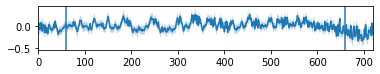

In [109]:
plt.plot(XMean_tmp[0,:])
plt.fill_between(np.arange(0,T), XUB_tmp[0,:], XLB_tmp[0,:], alpha=0.3)
plt.xlim([0, T])
for ll in range(Tmark_bin.size):
    plt.axvline(Tmark_bin[ll])
plt.savefig(plotFolder + "X1_NB1.svg")

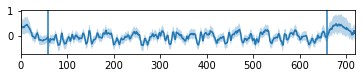

In [110]:
plt.plot(XMean_tmp[1,:])
plt.fill_between(np.arange(0,T), XUB_tmp[1,:], XLB_tmp[1,:], alpha=0.3)
plt.xlim([0, T])
for ll in range(Tmark_bin.size):
    plt.axvline(Tmark_bin[ll])
plt.savefig(plotFolder + "X2_NB1.svg")

# supplement -Y

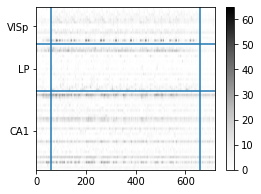

In [67]:
plt.rcParams['figure.figsize'] = [4, 3]
fig, ax = plt.subplots()
heatMap = ax.imshow(y, aspect="auto", cmap = 'Greys')
ax.set_xlim([0,T])
ax.set_ylim([0,N])
for ll in range(Tmark_bin.size):
    plt.axvline(Tmark_bin[ll])
tickPos = np.zeros((unique_neuron.size,))
for k in range(unique_neuron.size):
    pos_tmp = np.sum(counts_neuron[0:(k+1)]) + 0.5
    ax.axhline(pos_tmp)
    tickPos[k] = np.sum(counts_neuron[0:k]) + counts_neuron[k]/2
fig.colorbar(heatMap)
ax.set_yticks(tickPos)
ax.set_yticklabels(regionn_name)
plt.savefig(plotFolder + "pixel_spk.svg") 

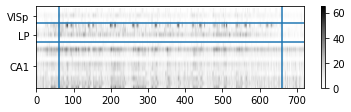

In [111]:
_,type_counts = np.unique(lab_neuron[neuron_plot], return_counts=True)
N_sub = sum(neuron_plot)

plt.rcParams['figure.figsize'] = [6, 1.5]
fig, ax = plt.subplots()
heatMap = ax.imshow(y[neuron_plot,:], aspect="auto", cmap = 'Greys')
ax.set_xlim([0,T])
ax.set_ylim([0,N_sub])
for ll in range(Tmark_bin.size):
    plt.axvline(Tmark_bin[ll])
tickPos = np.zeros((unique_neuron.size,))
for k in range(unique_neuron.size):
    pos_tmp = np.sum(type_counts[0:(k+1)]) + 0.5
    ax.axhline(pos_tmp)
    tickPos[k] = np.sum(type_counts[0:k]) + type_counts[k]/2
fig.colorbar(heatMap)
ax.set_yticks(tickPos)
ax.set_yticklabels(regionn_name)
plt.savefig(plotFolder + "pixel_spk_sub.svg") 

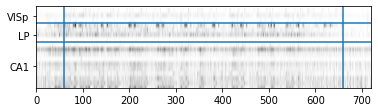

In [112]:
_,type_counts = np.unique(lab_neuron[neuron_plot], return_counts=True)
N_sub = sum(neuron_plot)

plt.rcParams['figure.figsize'] = [6, 1.5]
fig, ax = plt.subplots()
heatMap = ax.imshow(y[neuron_plot,:], aspect="auto", cmap = 'Greys')
ax.set_xlim([0,T])
ax.set_ylim([0,N_sub])
for ll in range(Tmark_bin.size):
    plt.axvline(Tmark_bin[ll])
tickPos = np.zeros((unique_neuron.size,))
for k in range(unique_neuron.size):
    pos_tmp = np.sum(type_counts[0:(k+1)]) + 0.5
    ax.axhline(pos_tmp)
    tickPos[k] = np.sum(type_counts[0:k]) + type_counts[k]/2
# fig.colorbar(heatMap)
ax.set_yticks(tickPos)
ax.set_yticklabels(regionn_name)
plt.savefig(plotFolder + "pixel_spk_sub_noCBar.svg") 